# Informe de entrenamiento Lurigancho
Este cuaderno reúne tablas y visualizaciones para los archivos `train_log_abstract.csv`, `train_log_lurigancho_fixed.csv`, `train_log_lurigancho_random.csv` y `lurigancho_fixed_eval_det.csv`.

Las celdas siguientes muestran estadísticos agregados, episodios extremos, comparaciones visuales entre datasets y las gráficas exportadas previamente para que puedas revisar todos los artefactos desde un único lugar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Image

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (10, 4)


In [3]:
LOG_SOURCES = [
    ("Curriculum abstracto", "results/train_log_abstract.csv"),
    ("Lurigancho determinista (fixed)", "results/train_log_lurigancho_fixed.csv"),
    ("Lurigancho aleatorio (random)", "results/train_log_lurigancho_random.csv"),
]

logs = {}
for label, path in LOG_SOURCES:
    df = pd.read_csv(path)
    logs[label] = df
    display(Markdown(f"**{label}** — {len(df)} episodios"))
    display(df.head(3))

eval_df = pd.read_csv("results/lurigancho_fixed_eval_det.csv")
display(Markdown("**Resultados de evaluación (escenario determinista)**"))
display(eval_df)


**Curriculum abstracto** — 275 episodios

,episode,coverage,return,adv,phase,loss_pi,loss_v,episode_seconds,total_seconds
0,0,0.13636,-1.92862,-1.94414,phase1_simple,0.135213,1.253063,19.389,19.390
1,1,0.66667,-1.79416,0.23571,phase1_simple,0.217594,10.349204,23.101,42.492
2,2,0.54545,-2.93684,-1.12804,phase1_simple,0.155285,7.859030,14.754,57.247


**Lurigancho determinista (fixed)** — 315 episodios

,episode,coverage,return,adv,phase,loss_pi,loss_v,episode_seconds,total_seconds
0,0,0.88,15.62236,-7.57779,lurigancho_fixed,0.296765,616.086670,506.136,506.137
1,1,0.88,8.74683,-5.85316,lurigancho_fixed,-0.027586,12.851137,515.232,1021.399
2,2,0.88,5.20269,-6.01096,lurigancho_fixed,0.490791,11146.209961,536.827,1558.264


**Lurigancho aleatorio (random)** — 315 episodios

,episode,coverage,return,adv,phase,loss_pi,loss_v,episode_seconds,total_seconds
0,0,0.90,7.55751,7.65850,lurigancho_random,0.657336,5182.883301,29.025,29.026
1,1,0.78,13.16002,6.92434,lurigancho_random,0.015541,1364.408325,17.460,46.488
2,2,0.50,11.99684,1.01606,lurigancho_random,0.036743,75.360832,11.128,57.618


**Resultados de evaluación (escenario determinista)**

,avg_tardiness_mean,avg_tardiness_std,coverage_mean,coverage_std,distance_mean,distance_std,duration_mean,duration_std,energy_per_uav_mean,energy_per_uav_std,policy,rtb_mean,rtb_std,served_mean,served_std,total_pois_mean,total_pois_std,violations_mean,violations_std
0,0.438,0.215304,0.435,5.133225e-02,754472.4405,4.781033e+04,5000.0,0.0,5525.229375,218.665038,marl,34.7,3.689173,21.75,2.566613,50.0,0.0,0.85,0.357071
1,0.000,0.000000,0.020,3.469447e-18,427.8240,5.684342e-14,5000.0,0.0,5241.015500,0.000000,greedy,4.0,0.000000,1.00,0.000000,50.0,0.0,0.00,0.000000
2,3.378,2.277103,0.715,1.487111e-01,13880.0835,2.417855e+03,5000.0,0.0,5246.759375,1.629740,genetic,0.0,0.000000,35.75,7.435556,50.0,0.0,4.45,1.856744


In [4]:
summary_rows = []
for label, df in logs.items():
    summary_rows.append({
        "dataset": label,
        "episodios": len(df),
        "coverage_media": df["coverage"].mean(),
        "coverage_std": df["coverage"].std(),
        "return_medio": df["return"].mean(),
        "adv_medio": df["adv"].mean(),
        "loss_pi_media": df["loss_pi"].mean(),
        "loss_v_media": df["loss_v"].mean(),
        "duracion_media_s": df["episode_seconds"].mean(),
    })

summary_df = pd.DataFrame(summary_rows).set_index("dataset")
display(Markdown("**Estadísticos globales**"))
display(summary_df.round(3))

last10_rows = []
for label, df in logs.items():
    tail = df.tail(10)
    last10_rows.append({
        "dataset": label,
        "coverage_ultimos10": tail["coverage"].mean(),
        "return_ultimos10": tail["return"].mean(),
        "adv_ultimos10": tail["adv"].mean(),
        "loss_pi_ultimos10": tail["loss_pi"].mean(),
        "loss_v_ultimos10": tail["loss_v"].mean(),
    })

last10_df = pd.DataFrame(last10_rows).set_index("dataset")
display(Markdown("**Promedios de los últimos 10 episodios**"))
display(last10_df.round(3))


**Estadísticos globales**

,episodios,coverage_media,coverage_std,return_medio,adv_medio,loss_pi_media,loss_v_media,duracion_media_s
dataset,,,,,,,,
Curriculum abstracto,275,0.362,0.208,-2.367,-0.078,-0.013,10.709,40.442
Lurigancho determinista (fixed),315,0.574,0.165,-3.452,-0.522,-0.017,72.922,273.554
Lurigancho aleatorio (random),315,0.589,0.259,6.429,0.337,-0.022,89.882,41.963


**Promedios de los últimos 10 episodios**

,coverage_ultimos10,return_ultimos10,adv_ultimos10,loss_pi_ultimos10,loss_v_ultimos10
dataset,,,,,
Curriculum abstracto,0.099,-3.195,-0.035,-0.001,1.891
Lurigancho determinista (fixed),0.542,-4.089,-0.106,-0.083,18.007
Lurigancho aleatorio (random),0.864,5.359,0.326,-0.024,57.985


In [5]:
records = []
criteria = [
    ("Mayor cobertura", "coverage", "max"),
    ("Menor cobertura", "coverage", "min"),
    ("Mejor retorno", "return", "max"),
    ("Peor retorno", "return", "min"),
]

for label, df in logs.items():
    for crit_label, column, mode in criteria:
        idx = df[column].idxmax() if mode == "max" else df[column].idxmin()
        row = df.loc[idx, ["episode", "coverage", "return", "adv", "loss_pi", "loss_v", "episode_seconds"]]
        records.append({
            "dataset": label,
            "criterio": crit_label,
            "episodio": int(row["episode"]),
            "coverage": row["coverage"],
            "return": row["return"],
            "adv": row["adv"],
            "loss_pi": row["loss_pi"],
            "loss_v": row["loss_v"],
            "duracion_s": row["episode_seconds"],
        })

extremes_df = pd.DataFrame(records)
display(Markdown("**Episodios extremos por métrica**"))
display(extremes_df.round(3))


**Episodios extremos por métrica**

,dataset,criterio,episodio,coverage,return,adv,loss_pi,loss_v,duracion_s
0,Curriculum abstracto,Mayor cobertura,16,1.000,-0.049,0.009,-0.147,6.359,30.548
1,Curriculum abstracto,Menor cobertura,34,0.000,-3.685,-0.073,-0.152,0.238,46.128
2,Curriculum abstracto,Mejor retorno,0,0.409,1.369,1.496,-0.097,245.130,18.524
3,Curriculum abstracto,Peor retorno,123,0.000,-5.332,-2.910,-0.164,15.458,40.744
4,Lurigancho determinista (fixed),Mayor cobertura,0,0.880,15.622,-7.578,0.297,616.087,506.136
5,Lurigancho determinista (fixed),Menor cobertura,20,0.120,-1.440,-0.929,0.447,29.322,272.177
6,Lurigancho determinista (fixed),Mejor retorno,0,0.880,15.622,-7.578,0.297,616.087,506.136
7,Lurigancho determinista (fixed),Peor retorno,125,0.800,-6.928,-2.143,-0.121,42.045,248.662
8,Lurigancho aleatorio (random),Mayor cobertura,47,1.000,6.638,1.971,-0.133,53.373,40.673
9,Lurigancho aleatorio (random),Menor cobertura,1,0.000,-3.561,-0.095,0.483,0.987,45.232


In [12]:
import numpy as np

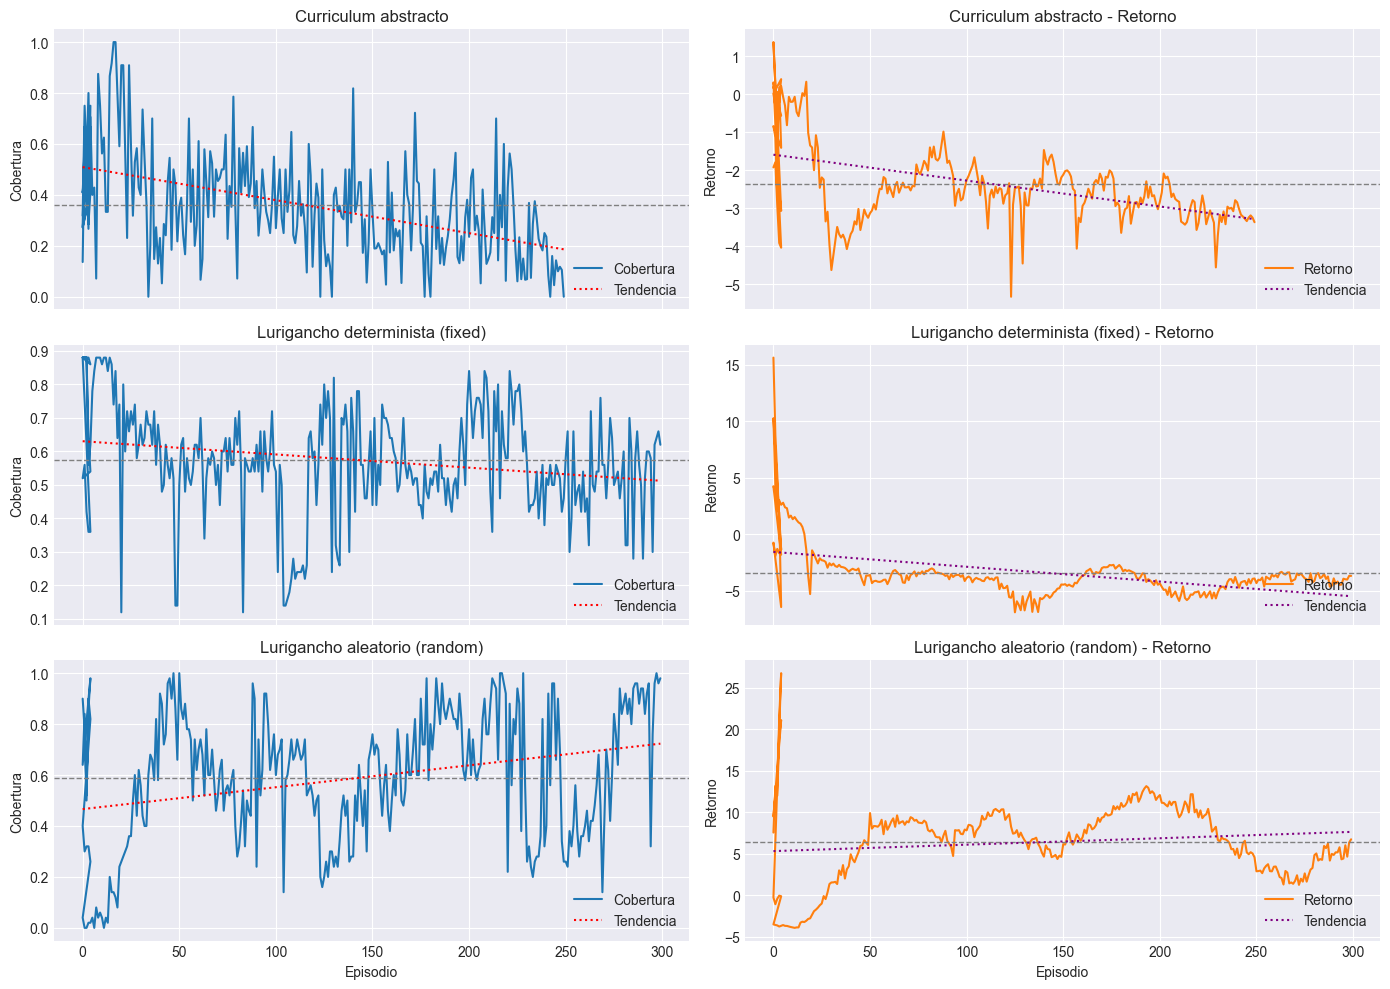

In [ ]:
fig, axes = plt.subplots(len(LOG_SOURCES), 2, figsize=(14, 10), sharex='col')

for idx, (label, _) in enumerate(LOG_SOURCES):
    df = logs[label]

    # --- Cobertura ---
    ax_cov = axes[idx, 0]
    ax_cov.plot(df["episode"], df["coverage"], label="Cobertura")

    # Línea horizontal: media
    ax_cov.axhline(df["coverage"].mean(), color="gray", linestyle="--", linewidth=1)

    # Tendencia cobertura
    z_cov = np.polyfit(df["episode"], df["coverage"], 1)
    p_cov = np.poly1d(z_cov)
    ax_cov.plot(
        df["episode"],
        p_cov(df["episode"]),
        color="red",
        linestyle=":",
        linewidth=1.5,
        label="Tendencia"
    )

    ax_cov.set_ylabel("Cobertura")
    ax_cov.set_title(label)
    ax_cov.legend(loc="lower right")

    # --- Retorno ---
    ax_ret = axes[idx, 1]
    ax_ret.plot(df["episode"], df["return"], color="#ff7f0e", label="Retorno")

    ax_ret.axhline(df["return"].mean(), color="gray", linestyle="--", linewidth=1)

    # Tendencia retorno
    z_ret = np.polyfit(df["episode"], df["return"], 1)
    p_ret = np.poly1d(z_ret)
    ax_ret.plot(
        df["episode"],
        p_ret(df["episode"]),
        color="purple",
        linestyle=":",
        linewidth=1.5,
        label="Tendencia"
    )

    ax_ret.set_ylabel("Retorno")
    ax_ret.set_title(f"{label} - Retorno")
    ax_ret.legend(loc="lower right")

axes[-1, 0].set_xlabel("Episodio")
axes[-1, 1].set_xlabel("Episodio")a

plt.tight_layout()
plt.show()


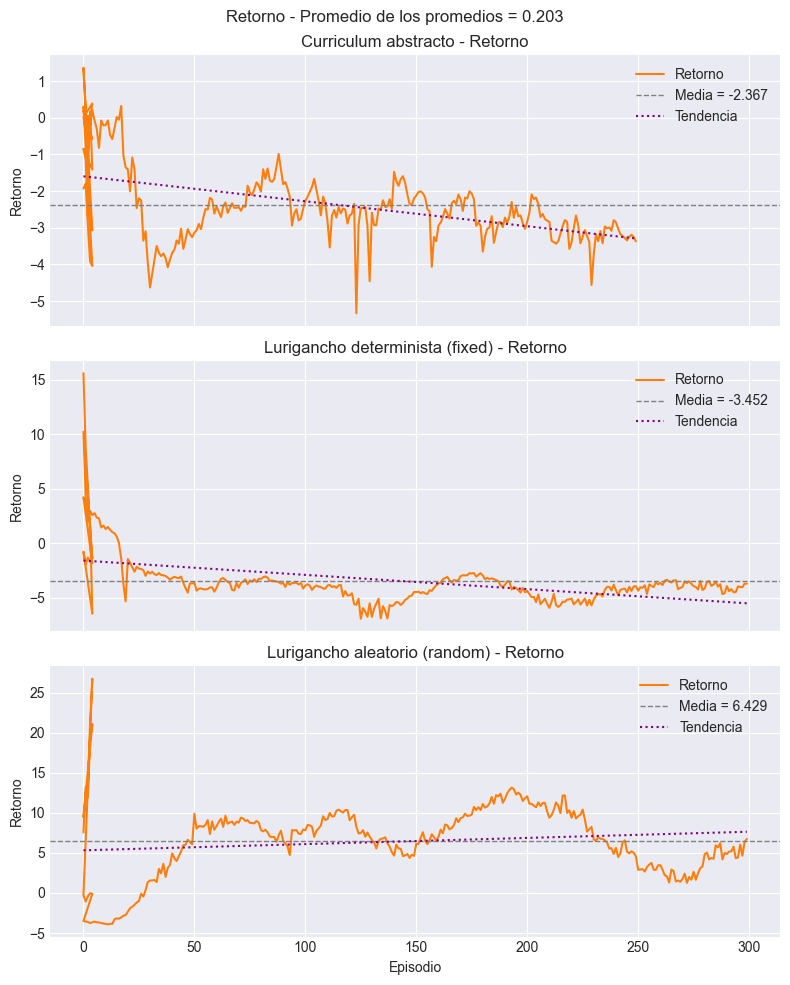

In [16]:
# --- PLOT RETORNO ---

fig, axes = plt.subplots(len(LOG_SOURCES), 1, figsize=(8, 10), sharex=True)

ret_means = []

for idx, (label, _) in enumerate(LOG_SOURCES):
    df = logs[label]
    ax_ret = axes[idx] if len(LOG_SOURCES) > 1 else axes

    # Media de este log
    mean_ret = df["return"].mean()
    ret_means.append(mean_ret)

    # Curva de retorno (línea naranja)
    ax_ret.plot(
        df["episode"],
        df["return"],
        color="#ff7f0e",
        label="Retorno"
    )

    # Línea horizontal: media
    ax_ret.axhline(
        mean_ret,
        color="gray",
        linestyle="--",
        linewidth=1,
        label=f"Media = {mean_ret:.3f}"
    )

    # Tendencia (regresión lineal)
    z_ret = np.polyfit(df["episode"], df["return"], 1)
    p_ret = np.poly1d(z_ret)
    ax_ret.plot(
        df["episode"],
        p_ret(df["episode"]),
        color="purple",
        linestyle=":",
        linewidth=1.5,
        label="Tendencia"
    )

    ax_ret.set_ylabel("Retorno")
    ax_ret.set_title(f"{label} - Retorno")
    ax_ret.legend(loc="upper right")

axes[-1].set_xlabel("Episodio")

# Promedio del promedio de retorno (entre todas las fuentes)
global_ret_mean = np.mean(ret_means)
fig.suptitle(f"Retorno - Promedio de los promedios = {global_ret_mean:.3f}", y=0.98)

plt.tight_layout()
plt.show()


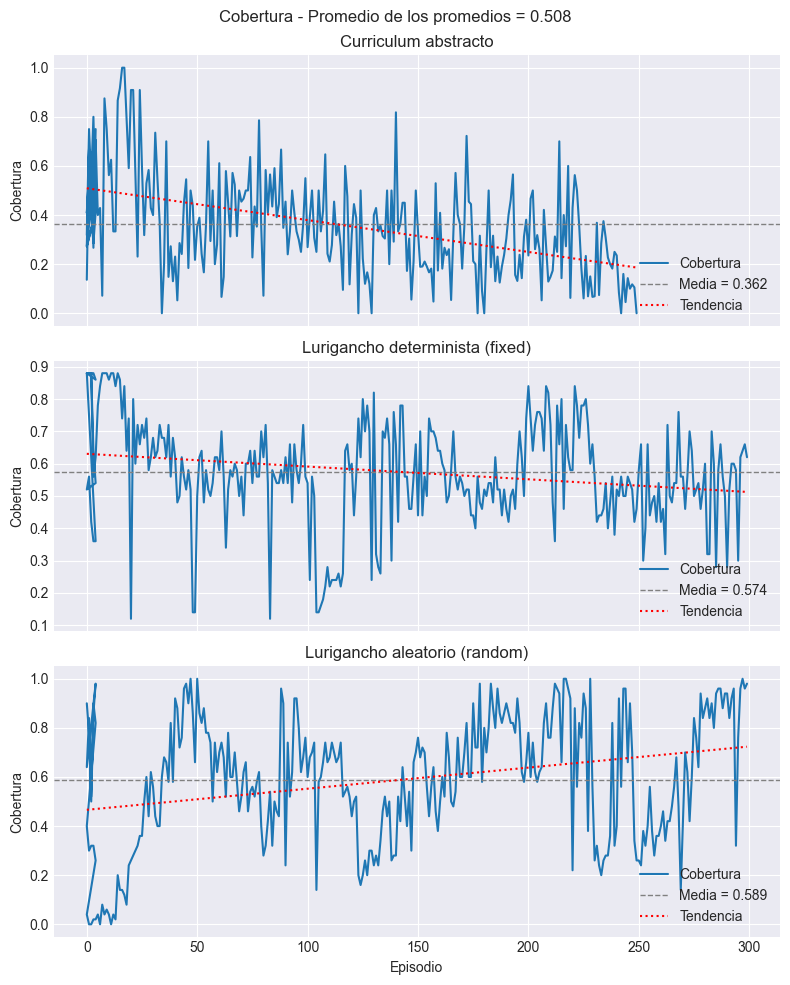

In [15]:
# --- PLOT COBERTURA ---

fig, axes = plt.subplots(len(LOG_SOURCES), 1, figsize=(8, 10), sharex=True)

cov_means = []

for idx, (label, _) in enumerate(LOG_SOURCES):
    df = logs[label]
    ax_cov = axes[idx] if len(LOG_SOURCES) > 1 else axes

    # Media de este log
    mean_cov = df["coverage"].mean()
    cov_means.append(mean_cov)

    # Curva de cobertura
    ax_cov.plot(df["episode"], df["coverage"], label=f"Cobertura")

    # Línea horizontal: media
    ax_cov.axhline(mean_cov, color="gray", linestyle="--", linewidth=1,
                   label=f"Media = {mean_cov:.3f}")

    # Tendencia (regresión lineal)
    z_cov = np.polyfit(df["episode"], df["coverage"], 1)
    p_cov = np.poly1d(z_cov)
    ax_cov.plot(
        df["episode"],
        p_cov(df["episode"]),
        color="red",
        linestyle=":",
        linewidth=1.5,
        label="Tendencia"
    )

    ax_cov.set_ylabel("Cobertura")
    ax_cov.set_title(label)
    ax_cov.legend(loc="lower right")

axes[-1].set_xlabel("Episodio")

# Promedio del promedio de cobertura (entre todas las fuentes)
global_cov_mean = np.mean(cov_means)
fig.suptitle(f"Cobertura - Promedio de los promedios = {global_cov_mean:.3f}", y=0.98)

plt.tight_layout()
plt.show()


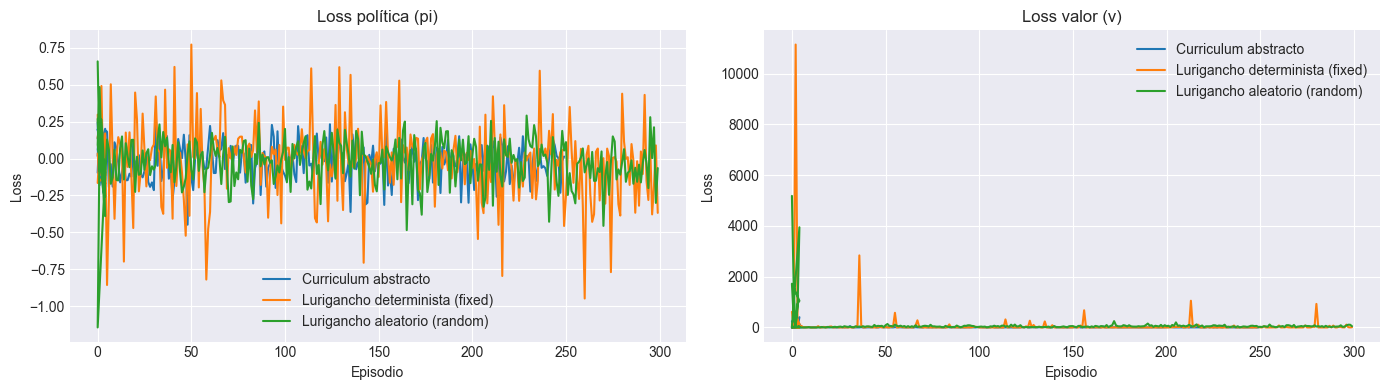

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
for label, _ in LOG_SOURCES:
    df = logs[label]
    axes[0].plot(df["episode"], df["loss_pi"], label=label)
    axes[1].plot(df["episode"], df["loss_v"], label=label)
axes[0].set_title("Loss política (pi)")
axes[0].set_xlabel("Episodio")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[1].set_title("Loss valor (v)")
axes[1].set_xlabel("Episodio")
axes[1].set_ylabel("Loss")
axes[1].legend()
plt.tight_layout()
plt.show()


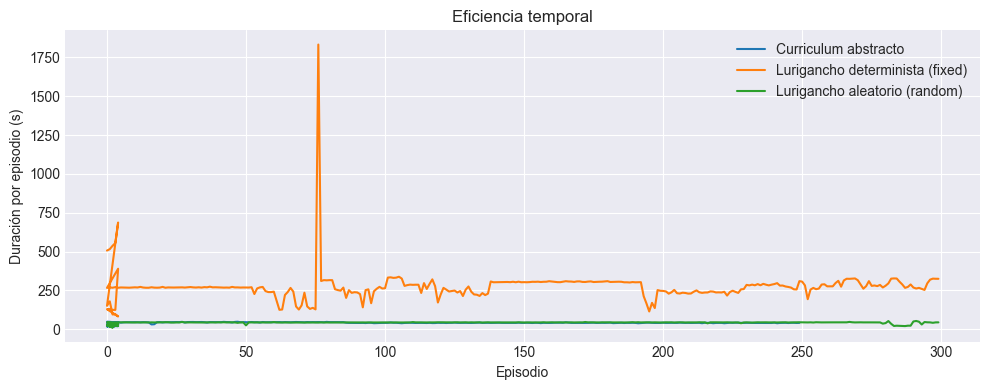

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
for label, _ in LOG_SOURCES:
    df = logs[label]
    ax.plot(df["episode"], df["episode_seconds"], label=label)
ax.set_ylabel("Duración por episodio (s)")
ax.set_xlabel("Episodio")
ax.set_title("Eficiencia temporal")
ax.legend()
plt.tight_layout()
plt.show()


**Comparativa de políticas en evaluación**

,policy,coverage_mean,served_mean,rtb_mean,violations_mean,distance_mean,energy_per_uav_mean
0,marl,0.435,21.75,34.7,0.85,754472.440,5525.229
1,greedy,0.020,1.00,4.0,0.00,427.824,5241.016
2,genetic,0.715,35.75,0.0,4.45,13880.084,5246.759


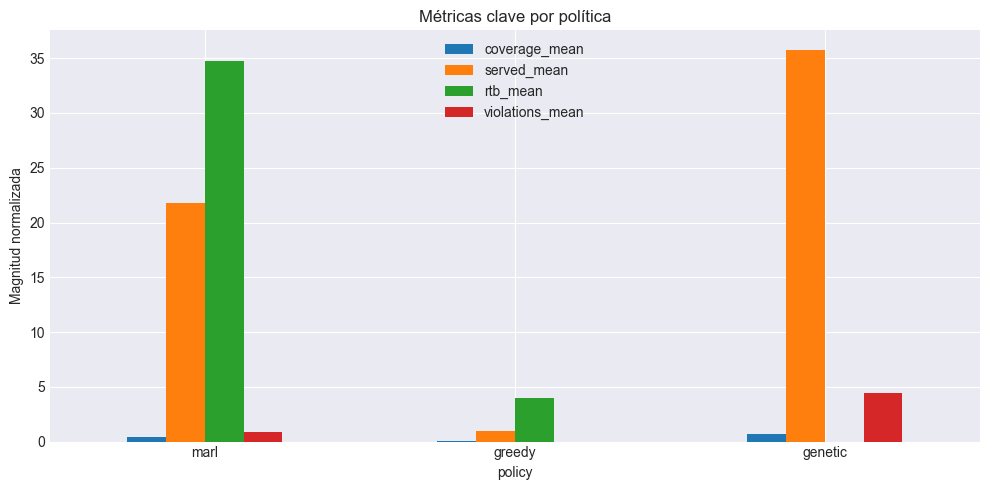

In [9]:
eval_view = eval_df[["policy", "coverage_mean", "served_mean", "rtb_mean", "violations_mean", "distance_mean", "energy_per_uav_mean"]]
display(Markdown("**Comparativa de políticas en evaluación**"))
display(eval_view.round(3))

plot_df = eval_view.set_index("policy")[["coverage_mean", "served_mean", "rtb_mean", "violations_mean"]]
plot_df.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Magnitud normalizada")
plt.title("Métricas clave por política")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Cobertura por episodio (determinista)

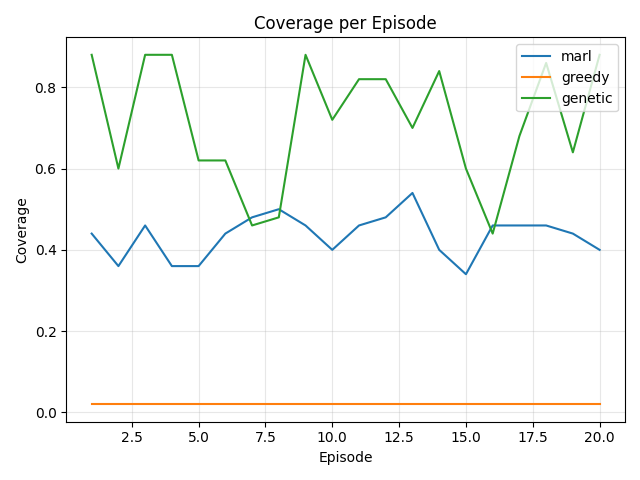

#### Cobertura promedio por política

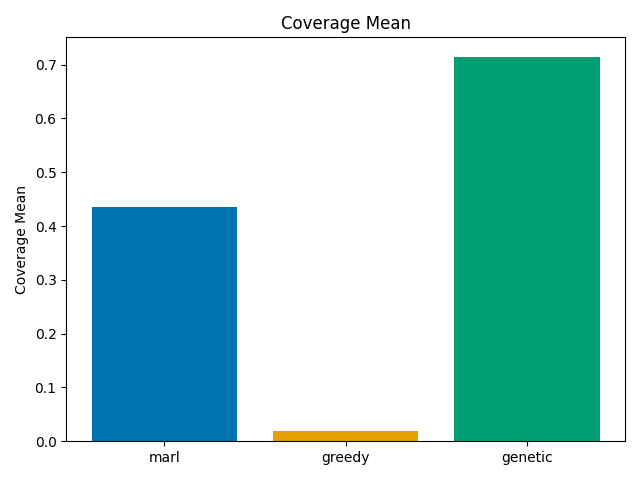

#### Distancia por episodio

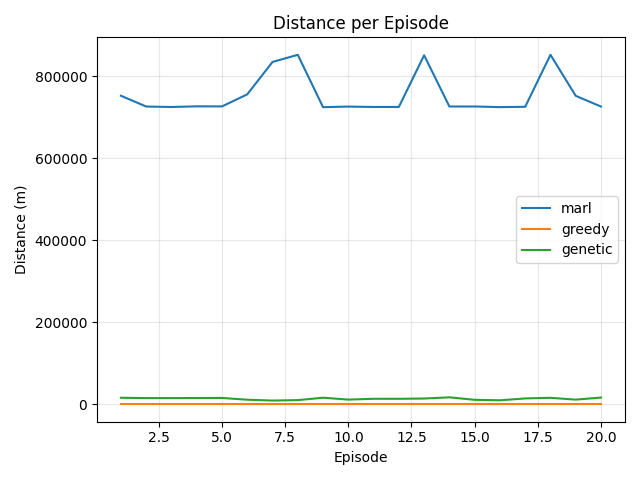

#### Consumo energético por episodio

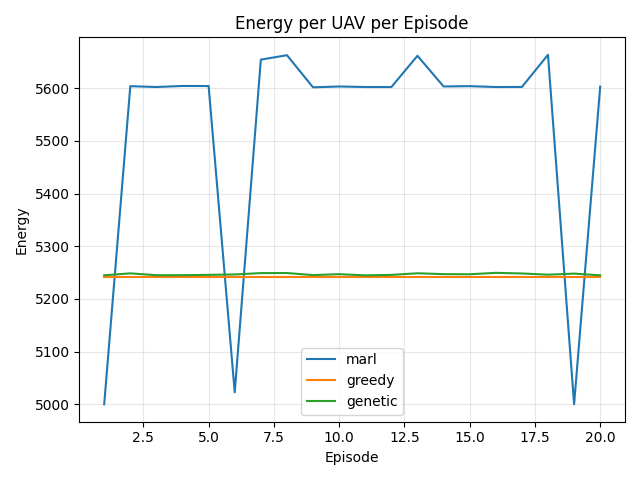

#### RTB promedio por política

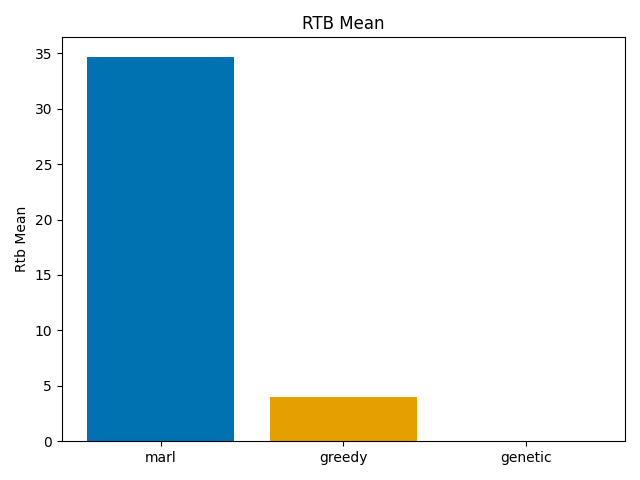

#### Pérdida entrenamiento Lurigancho fixed

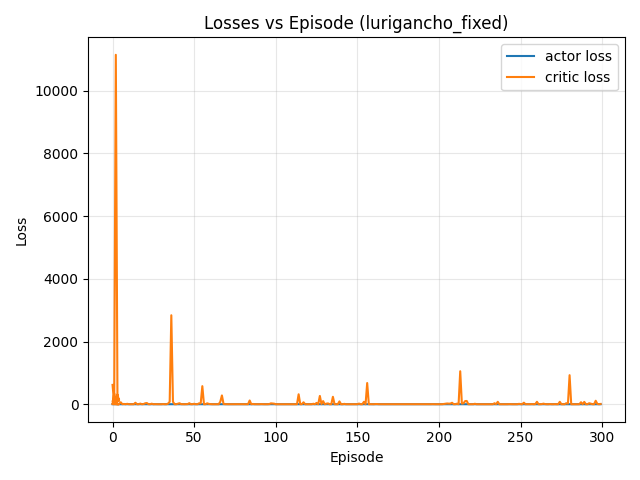

#### Pérdida entrenamiento Abstract

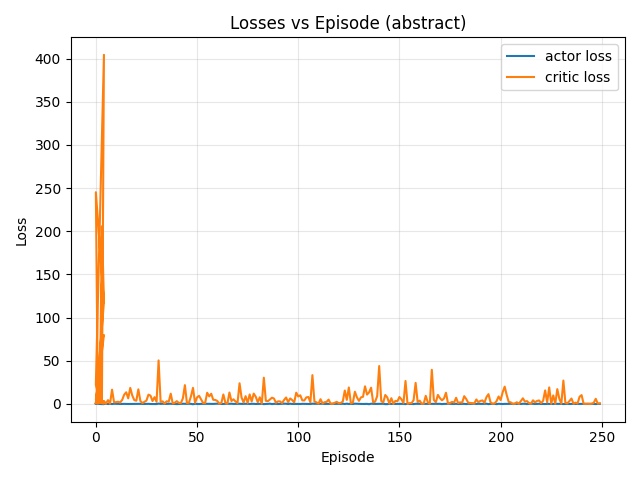

In [10]:
plot_assets = [
    ("Cobertura por episodio (determinista)", "results/plots/lurigancho_fixed_det/coverage_per_episode.png"),
    ("Cobertura promedio por política", "results/plots/lurigancho_fixed_det/coverage_mean_bar.png"),
    ("Distancia por episodio", "results/plots/lurigancho_fixed_det/distance_per_episode.png"),
    ("Consumo energético por episodio", "results/plots/lurigancho_fixed_det/energy_per_uav_per_episode.png"),
    ("RTB promedio por política", "results/plots/lurigancho_fixed_det/rtb_mean_bar.png"),
    ("Pérdida entrenamiento Lurigancho fixed", "results/plots/lurigancho_fixed_loss.png"),
    ("Pérdida entrenamiento Abstract", "results/plots/abstract_loss.png"),
]

for title, path in plot_assets:
    display(Markdown(f"#### {title}"))
    display(Image(filename=path, width=640))
